In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
# books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books = pd.read_csv('BX-Books.csv')
# books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
# books.to_csv('BX-Books.csv')
books.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [48]:
# users = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users = pd.read_csv('BX-Users.csv')
# users.columns = ['userID', 'Location', 'Age']
# users.to_csv("BX-Users.csv")
users.head()

,Unnamed: 0,userID,Location,Age
0,0,1,"nyc, new york, usa",NaN
1,1,2,"stockton, california, usa",18.0
2,2,3,"moscow, yukon territory, russia",NaN
3,3,4,"porto, v.n.gaia, portugal",17.0
4,4,5,"farnborough, hants, united kingdom",NaN


In [49]:
# ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings = pd.read_csv('BX-Book-Ratings.csv')
# ratings.columns = ['userID', 'ISBN', 'bookRating']
# ratings.to_csv("BX-Book-Ratings.csv")
ratings.head()

,Unnamed: 0,userID,ISBN,bookRating
0,0,276725,034545104X,0
1,1,276726,0155061224,5
2,2,276727,0446520802,0
3,3,276729,052165615X,3
4,4,276729,0521795028,6


In [50]:
ratings.ISBN.unique

<bound method Series.unique of 0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object>

In [51]:
print(len(pd.unique(ratings['ISBN'])))

340556


In [52]:
books.shape

(271360, 9)

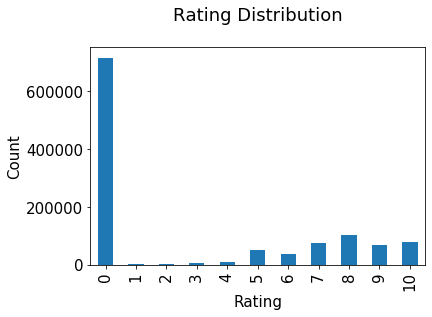

In [53]:
plt.rc("font", size=15)
ratings.bookRating.value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [54]:
print('books:',books.shape,'\n')
print('users:',users.shape,'\n')
print('ratings:',ratings.shape,'\n')

books: (271360, 9) 

users: (278858, 4) 

ratings: (1149780, 4) 



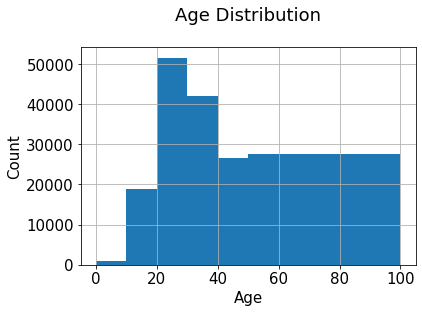

In [55]:
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [56]:
counts1 = ratings['userID'].value_counts()
ratings = ratings[ratings['userID'].isin(counts1[counts1 >= 10].index)]
counts = ratings['bookRating'].value_counts()
ratings = ratings[ratings['bookRating'].isin(counts[counts >= 20].index)]

In [57]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['yearOfPublication', 'publisher', 'bookAuthor', 'imageUrlS', 'imageUrlM', 'imageUrlL']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
combine_book_rating.head()

,Unnamed: 0_x,userID,ISBN,bookRating,Unnamed: 0_y,bookTitle
0,31,276762,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...
1,126883,29259,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...
2,152996,35050,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...
3,407112,98391,034544003X,9,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...
4,558688,134797,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...


In [58]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['bookTitle'])

book_ratingCount = (combine_book_rating.
     groupby(by = ['bookTitle'])['bookRating'].
     count().
     reset_index().
     rename(columns = {'bookRating': 'totalRatingCount'})
     [['bookTitle', 'totalRatingCount']]
    )
book_ratingCount.head()

,bookTitle,totalRatingCount
0,Earth Prayers From around the World: 365 Pray...,8
1,Final Fantasy Anthology: Official Strategy Gu...,4
2,Flight of Fancy: American Heiresses (Zebra Ba...,2
3,Little Comic Shop of Horrors (Give Yourself G...,4
4,Mystery Mile,2


In [59]:
rating_with_totalRatingCount = combine_book_rating.merge(book_ratingCount, left_on = 'bookTitle', right_on = 'bookTitle', how = 'left')
rating_with_totalRatingCount.head()

,Unnamed: 0_x,userID,ISBN,bookRating,Unnamed: 0_y,bookTitle,totalRatingCount
0,31,276762,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...,13
1,126883,29259,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...,13
2,152996,35050,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...,13
3,407112,98391,034544003X,9,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...,13
4,558688,134797,034544003X,0,55440,Southampton Row (Charlotte &amp; Thomas Pitt N...,13


In [60]:
book_ratingCount['totalRatingCount'].describe()

count    60655.000000
mean         2.655923
std          8.106657
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        563.000000
Name: totalRatingCount, dtype: float64

In [61]:
popularity_threshold = 20
rating_popular_book = rating_with_totalRatingCount.query('totalRatingCount >= @popularity_threshold')
rating_popular_book.head()

,Unnamed: 0_x,userID,ISBN,bookRating,Unnamed: 0_y,bookTitle,totalRatingCount
64,97,276798,3548603203,6,3217,Artemis Fowl.,25
65,57425,11676,3548603203,9,3217,Artemis Fowl.,25
66,335041,79590,3548603203,6,3217,Artemis Fowl.,25
67,376877,90830,3548603203,6,3217,Artemis Fowl.,25
68,509329,123947,3548603203,9,3217,Artemis Fowl.,25


In [62]:
rating_popular_book.shape

(37893, 7)

In [63]:
users_combined_rating = rating_popular_book.merge(users, left_on = 'userID', right_on = 'userID', how = 'left')
users_combined_rating = users_combined_rating.drop('Age',axis=1)
users_combined_rating.head()

,Unnamed: 0_x,userID,ISBN,bookRating,Unnamed: 0_y,bookTitle,totalRatingCount,Unnamed: 0,Location
0,97,276798,3548603203,6,3217,Artemis Fowl.,25,276797,"mannheim, baden-wuerttemberg, germany"
1,57425,11676,3548603203,9,3217,Artemis Fowl.,25,11675,"n/a, n/a, n/a"
2,335041,79590,3548603203,6,3217,Artemis Fowl.,25,79589,"berlin, berlin, germany"
3,376877,90830,3548603203,6,3217,Artemis Fowl.,25,90829,"rottenburg, baden-wuerttemberg, germany"
4,509329,123947,3548603203,9,3217,Artemis Fowl.,25,123946,"niedernhausen, hessen, germany"


In [64]:
users_combined_rating.shape

(37893, 9)

In [65]:
# from scipy.sparse import csr_matrix
# users_combined_rating = users_combined_rating.drop_duplicates(['userID', 'bookTitle'])
# users_combined_rating_pivot = users_combined_rating.pivot(index = 'bookTitle', columns = 'userID', values = 'bookRating').fillna(0)
# users_combined_rating_matrix = csr_matrix(users_combined_rating_pivot.values)

# from sklearn.neighbors import NearestNeighbors


# model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
# model_knn.fit(users_combined_rating_matrix)

In [66]:
# users_combined_rating_pivot.head()

In [67]:
# print(users_combined_rating_matrix) 

In [68]:
# query_index = np.random.choice(users_combined_rating_pivot.shape[0])
# print(query_index)
# distances, indices = model_knn.kneighbors(users_combined_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [69]:
# query = '311 Pelican Court' 
# users_combined_rating_pivot.index[3]
# users_combined_rating_pivot.iloc[users_combined_rating_pivot.index[query],:].values.reshape(1,-1)

In [70]:
# users_combined_rating_pivot.index[query_index]

In [71]:
# list_books = [];
# for i in range(0, len(distances.flatten())):
#     if i == 0:
#         print('Recommendations for {0}:\n'.format(users_combined_rating_pivot.index[query_index]))
#     else:
#         print('{0}: {1}, with distance of {2}:'.format(i, users_combined_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))
# #         print(book_isbn.iloc[0]['ISBN'])

In [72]:
book_isbn = books[['ISBN','bookTitle']]
book_isbn.head()

,ISBN,bookTitle
0,195153448,Classical Mythology
1,2005018,Clara Callan
2,60973129,Decision in Normandy
3,374157065,Flu: The Story of the Great Influenza Pandemic...
4,393045218,The Mummies of Urumchi


In [73]:
# book_isbn.loc[book_isbn.index==2,'ISBN'].values[0]
# book_isbn.loc[book_isbn['ISBN']==book_num,'bookTitle'].values[0]
book_isbn.shape

(271360, 2)

In [74]:
from scipy.sparse import csr_matrix
users_combined_rating = users_combined_rating.drop_duplicates(['userID', 'bookTitle'])
users_combined_rating_pivot = users_combined_rating.pivot(index = 'ISBN', columns = 'userID', values = 'bookRating').fillna(0)
users_combined_rating_matrix = csr_matrix(users_combined_rating_pivot.values)

from sklearn.neighbors import NearestNeighbors


model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(users_combined_rating_matrix)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [75]:
users_combined_rating_pivot.shape

(1134, 7964)

In [76]:
users_combined_rating.shape

(37790, 9)

In [77]:
users_combined_rating_pivot.head()

userID,8,99,183,242,243,254,383,388,408,424,...,278390,278418,278506,278535,278554,278563,278582,278633,278843,278851
ISBN,,,,,,,,,,,,,,,,,,,,,
000649840X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000654861X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002026478X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002089130X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
002089130x,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
users_combined_rating_pivot.to_csv('users_combined_rating_pivot.csv')

In [80]:
def get_book_name(book_num):
    return book_isbn.loc[book_isbn['ISBN']==book_num,'bookTitle'].values[0]

In [81]:
# query_index = np.random.choice(users_combined_rating_pivot.shape[0])
# print(query_index)
# distances, indices = model_knn.kneighbors(users_combined_rating_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

In [82]:
# list_books = [];
# for i in range(0, len(distances.flatten())):
#     if i == 0:
#         print('Recommendations for {0}:\n'.format(get_book_name(users_combined_rating_pivot.index[query_index])))
#     else:
#         book_num = users_combined_rating_pivot.index[indices.flatten()[i]]
#         book_name = get_book_name(book_num)
#         print('{0}: {1}-{2}, with distance of {3}:'.format(i, book_name, book_num, distances.flatten()[i]))
#         list_books.append(book_num)
# print(list_books)

In [83]:
query = '006008460X' 
# users_combined_rating_pivot.index[users_combined_rating_pivot.index==query]
distances, indices = model_knn.kneighbors(users_combined_rating_pivot.loc[users_combined_rating_pivot.index[users_combined_rating_pivot.index==query],:].values.reshape(1, -1), n_neighbors = 6)

In [84]:
print(indices)

[[  11 1132  883   17  267  705]]


In [85]:
list_books = [];
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(get_book_name(query)))
    else:
        book_num = users_combined_rating_pivot.index[indices.flatten()[i]]
        print()
        book_name = get_book_name(book_num)
        print('{0}: {1}-{2}, with distance of {3}:'.format(i, book_name, book_num, distances.flatten()[i]))
        list_books.append(book_num)
print(list_books)

Recommendations for Cheaper by the Dozen (Perennial Classics):


1: Three Fates-B0000T6KHI, with distance of 0.5869038076139862:

2: Petals on the River-1568655878, with distance of 0.5869038076139862:

3: A Secret Affair-006018650X, with distance of 0.7049312911528473:

4: Fool's Puzzle-042514545X, with distance of 0.7614781535642023:

5: Tomorrow's Promise: Can the Heart Let Go of Yesterday?-1551666014, with distance of 0.8215696213349198:
['B0000T6KHI', '1568655878', '006018650X', '042514545X', '1551666014']


In [86]:
import pickle
pickle.dump(model_knn, open('knn_model.pkl','wb'))

In [87]:
model_knn.get_params()

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'cosine',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'radius': 1.0}

In [88]:
users_combined_rating_pivot.loc[users_combined_rating_pivot.index[users_combined_rating_pivot.index.isin([query])],:].values

array([[0., 0., 0., ..., 0., 0., 0.]])

In [89]:
users_combined_rating_pivot.index

Index(['000649840X', '000654861X', '002026478X', '002089130X', '002089130x',
       '002542730X', '002542730x', '006000438X', '006000438x', '006000925X',
       ...
       '9505112076', '9506440298', '9681905849', 'B00006I4OX', 'B00006RGIO',
       'B00009EF82', 'B0000C7BNG', 'B0000E63CJ', 'B0000T6KHI', 'B0001PIOX4'],
      dtype='object', name='ISBN', length=1134)